# CONTENTS:-
- KMeans
- Hierarchical Clustering
- PCA


# DATASET :-PIMA  Diabetes

In [69]:
# 1.load the packages

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LogisticRegression
% matplotlib inline


In [36]:
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [70]:
# 2.Read the dataset

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [71]:
# check null entries

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
col_name=df.columns
for i in col_name:
    print(i,'has :',df[i].nunique(),"Unique values")

Pregnancies has : 17 Unique values
Glucose has : 136 Unique values
BloodPressure has : 47 Unique values
SkinThickness has : 51 Unique values
Insulin has : 186 Unique values
BMI has : 248 Unique values
DiabetesPedigreeFunction has : 517 Unique values
Age has : 52 Unique values
Outcome has : 2 Unique values


In [21]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 1.KMEANS Using sklearn

In [22]:
kmeans=KMeans(n_clusters=2)

In [32]:
X=df

In [33]:
kmeans.fit(X=df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
y=kmeans.labels_

In [37]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [38]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

In [39]:
kIdx = 10-1

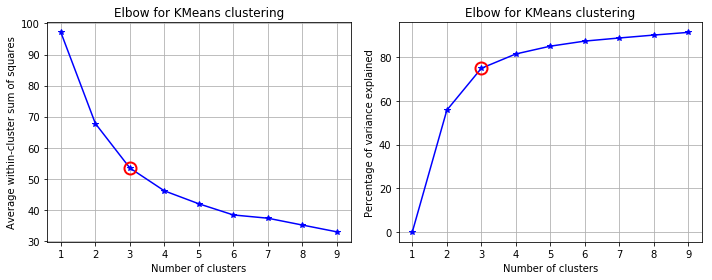

In [40]:
##### plot ###
kIdx = 2
# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

In [41]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [42]:
silhouette_score(X,y)

0.56877883426588527

In [43]:
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(X, labels, metric='euclidean'))

Text(0.5,1,'Silouette for K-means')

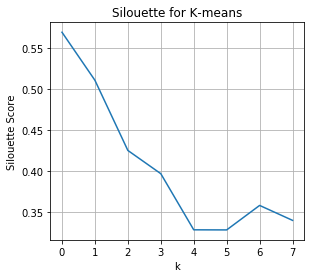

In [44]:
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

# 2.Hierarchical clustering Using sklearn

## Method= Single 

Z-Shape: (767, 4)


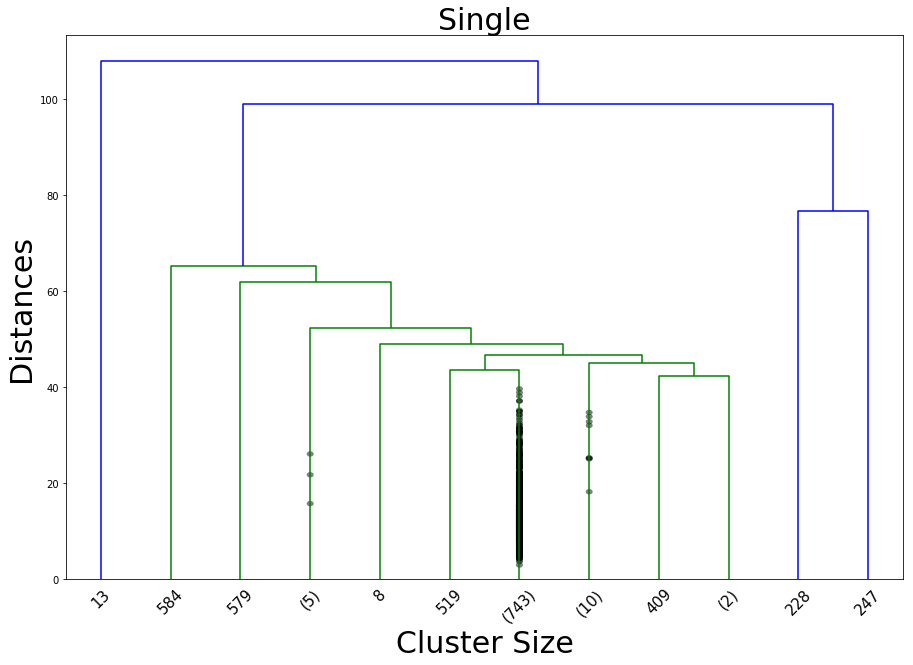

In [45]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='single')
print("Z-Shape:",Z.shape)
plt.title("Single",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# Method=Complete

Z-Shape: (767, 4)


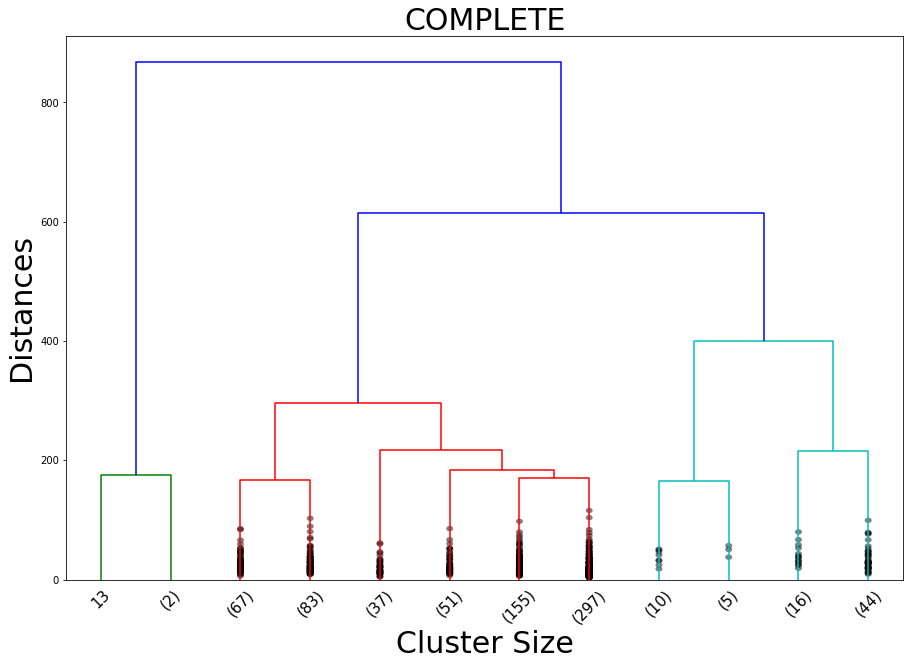

In [46]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='complete')
print("Z-Shape:",Z.shape)
plt.title("COMPLETE",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

## Method=Average

Z-Shape: (767, 4)


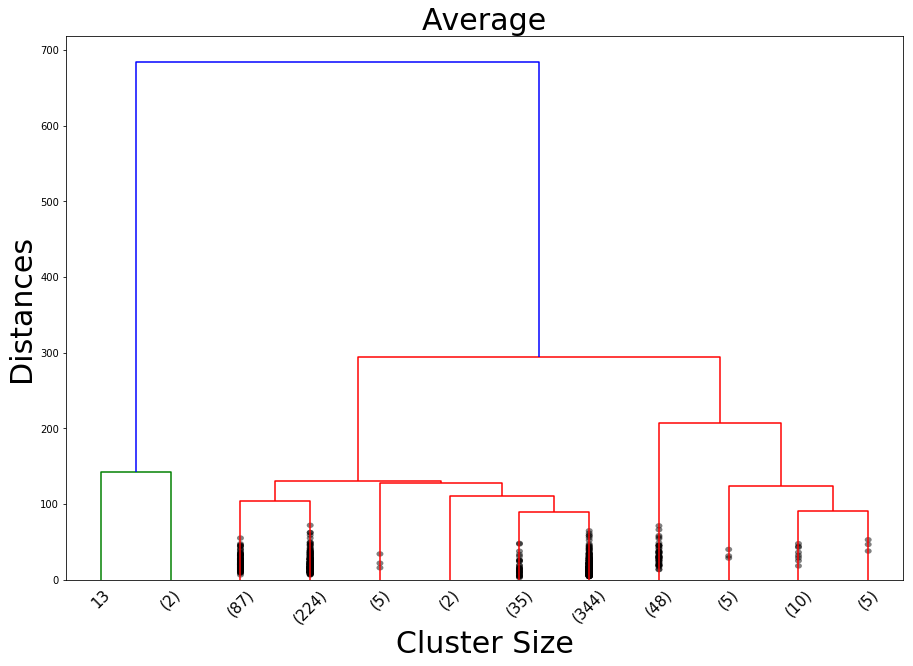

In [47]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# 3.PCA  Using sklearn

### Step 1: Normalize the data

In [48]:
X_std = StandardScaler().fit_transform(X)

In [49]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093  0.22218746]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788  0.46718972]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024  0.06515319]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885  0.07484969]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793  0.13071816]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912  0.29307627]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507  0.17407072]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378  0.23866675]
 [ 0.22218746  0.46718972  0.06515319  0.07484969  0.13071816  0.29307627
  

In [52]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [53]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.21599835  0.52744611  0.16451225  0.26505155 -0.54064221  0.07851795
  -0.4567731  -0.16088274  0.21176571]
 [ 0.43675677  0.09563451 -0.39141738  0.58107579  0.02524536 -0.20799965
   0.38274945  0.32712336  0.10877916]
 [ 0.30045538  0.04625339  0.62970532 -0.06830645 -0.16280013  0.32670833
   0.6078671  -0.01105718 -0.05937792]
 [ 0.30729203 -0.44839783  0.29432599  0.39477039  0.43491377  0.28199843
  -0.39795678 -0.07401586  0.1718095 ]
 [ 0.33633235 -0.35534569 -0.14165347 -0.47845101 -0.26883758 -0.08221649
  -0.00873019  0.09763514  0.65037442]
 [ 0.39734198 -0.21031643  0.2519303  -0.12644026 -0.16646311 -0.57252374
  -0.24100789  0.16321892 -0.52745778]
 [ 0.23763447 -0.17519467 -0.2853247   0.04961786 -0.09316407 -0.05719014
   0.17162837 -0.87352658 -0.15655457]
 [ 0.27865556  0.53320237  0.1261179  -0.28875418  0.61489048 -0.29942807
   0.00105491 -0.17111166  0.20428857]
 [ 0.41565279  0.15476805 -0.39461511 -0.31756221  0.06827401  0.58037812
  -0

In [54]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [55]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  26.13890652   45.85348467   58.30043055   68.09992922   77.48463379
   85.64983646   91.07676313   95.72322015  100.        ]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [60]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
y_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[ 18,  10],
       [  6, 120]], dtype=int64)

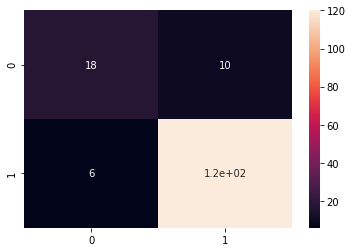

In [65]:
sns.heatmap(cm, annot=True)
plt.show()

In [66]:
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score:", ac)

Accuracy Score: 0.896103896104


In [67]:
classification=classification_report(y_test,y_pred)
print(classification)

             precision    recall  f1-score   support

          0       0.75      0.64      0.69        28
          1       0.92      0.95      0.94       126

avg / total       0.89      0.90      0.89       154

